In [1]:
import pandas as pd
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
csv_file = '/home/jean-cheramy/Bureau/keytrade-trustpilot-analysis/src/data/dataset.csv'
df = pd.read_csv(csv_file, sep='\t')
df.describe()

,rating,consumersReviewCountOnSameDomain,consumer_numberOfReviews,likes
count,1027.000000,1027.000000,1027.000000,1027.000000
mean,2.654333,1.042843,4.913340,0.588121
std,1.759488,0.221009,6.729477,0.924422
min,1.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,3.000000,0.000000
75%,5.000000,1.000000,6.000000,1.000000
max,5.000000,3.000000,78.000000,5.000000


In [4]:
for column, dtype in df.dtypes.items():
    print(f"{column}, Type: {dtype}")

text, Type: object
rating, Type: int64
consumer_id, Type: object
language, Type: object
reply_message, Type: object
consumer_countryCode, Type: object
consumersReviewCountOnSameDomain, Type: int64
dates_publishedDate, Type: object
consumer_numberOfReviews, Type: int64
reply_publishedDate, Type: object
likes, Type: int64
consumer_isVerified, Type: bool
title, Type: object


In [3]:
profile = ProfileReport(df, title="CSV Profile Report", explorative=True)
profile.to_file("/home/jean-cheramy/Bureau/keytrade-trustpilot-analysis/src/eda/profile_report.html") 


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 13/13 [00:00<00:00, 87.04it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:

# Load the dataset (Assumes 'balanced_test_set.csv' exists with a 'text' column)
csv_file = '/home/jean-cheramy/Bureau/keytrade-trustpilot-analysis/src/data/dataset.csv'
df = pd.read_csv(csv_file, sep='\t')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Compute text lengths
df['text_length'] = df['text'].apply(len)

# Compute metrics
length_stats = {
    'average_length': df['text_length'].mean(),
    'median_length': df['text_length'].median(),
    'min_length': df['text_length'].min(),
    'max_length': df['text_length'].max(),
    'std_length': df['text_length'].std(),
}

# Display metrics
print("Text Length Distribution Metrics:")
print(f"Average length: {length_stats['average_length']}")
print(f"Median length: {length_stats['median_length']}")
print(f"Min length: {length_stats['min_length']}")
print(f"Max length: {length_stats['max_length']}")
print(f"Standard deviation: {length_stats['std_length']}")

# 1. Histogram Plot
plt.figure(figsize=(8, 6))
df['text_length'].plot(kind='hist', bins=50, color='skyblue', edgecolor='black')
plt.title('Text Length Distribution (Histogram)')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig("../plots/text_length_distribution.png")

# 2. Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['text_length'], color='skyblue')
plt.title('Text Length Distribution (Box Plot)')
plt.xlabel('Text Length')
plt.savefig("../plots/text_length_distribution_box_plot.png")

# 3. Density Plot
plt.figure(figsize=(8, 6))
sns.kdeplot(df['text_length'], shade=True, color='skyblue', alpha=0.7)
plt.title('Text Length Distribution (Density Plot)')
plt.xlabel('Text Length')
plt.ylabel('Density')
plt.grid(True)
plt.savefig("../plots/text_length_distribution_density_plot.png")

# 4. Violin Plot (To show the distribution in a different way)
plt.figure(figsize=(8, 6))
sns.violinplot(x=df['text_length'], color='skyblue')
plt.title('Text Length Distribution (Violin Plot)')
plt.xlabel('Text Length')
plt.savefig("../plots/text_length_distribution_violin.png")


Text Length Distribution Metrics:
Average length: 358.4888023369036
Median length: 249.0
Min length: 10
Max length: 4470
Standard deviation: 409.08851830644534


/tmp/ipykernel_326350/275947448.py:47: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['text_length'], shade=True, color='skyblue', alpha=0.7)


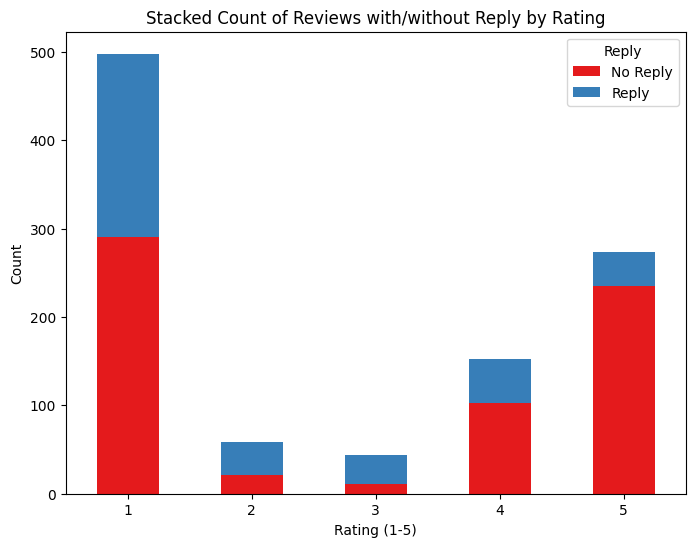

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (Ensure 'dataset.csv' exists with 'rating' and 'reply_message' columns)
csv_file = '/home/jean-cheramy/Bureau/keytrade-trustpilot-analysis/src/data/dataset.csv'
df = pd.read_csv(csv_file, sep="\t")

# Create a new column 'reply_binary' where 1 means reply exists and 0 means it's empty
df['reply_binary'] = df['reply_message'].apply(lambda x: 1 if pd.notnull(x) and x.strip() != '' else 0)

# Count occurrences for each rating and reply_binary combination
rating_reply_counts = df.groupby(['rating', 'reply_binary']).size().unstack(fill_value=0)

# Create stacked bar plot with the same palette
rating_reply_counts.plot(kind='bar', stacked=True, figsize=(8, 6), color=sns.color_palette('Set1'))
plt.xticks(rotation=0)

# Add plot title and labels
plt.title('Stacked Count of Reviews with/without Reply by Rating')
plt.xlabel('Rating (1-5)')
plt.ylabel('Count')
plt.legend(title='Reply', labels=['No Reply', 'Reply'])

# Save and show the plot
plt.savefig("../plots/rating_reply_stacked_bar.png")
plt.show()




In [14]:
# Create a new column 'reply_binary' where 1 means reply exists and 0 means it's empty
df['reply_binary'] = df['reply_message'].apply(lambda x: 1 if pd.notnull(x) and x.strip() != '' else 0)

plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='rating', y='reply_binary', palette='Set1')

# Add plot title and labels
plt.title('Reply Distribution by Rating (Violin Plot)')
plt.xlabel('Rating (1-5)')
plt.ylabel('Reply (1 = Exists, 0 = Empty)')
# Show the plot
plt.savefig("../plots/rating_reply_violin_plot.png")


/tmp/ipykernel_326350/354037035.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='rating', y='reply_binary', palette='Set1')


In [17]:
# Calculate the number of reviews per customer
customer_review_counts = df['consumer_id'].value_counts()

# Filter customers who have written more than 1 review (repeated reviews)
repeated_reviews = customer_review_counts[customer_review_counts > 1]

# Calculate the number of repeated reviews (sum of counts where customer has > 1 review)
num_repeated_reviews = repeated_reviews.sum()

# Calculate the total number of reviews in the dataset
total_reviews = len(df)

# Calculate the percentage of repeated reviews out of the total reviews
percentage_repeated_reviews = (num_repeated_reviews / total_reviews) * 100

# Display the results
print(f"Number of repeated reviews: {num_repeated_reviews}")
print(f"Percentage of repeated reviews in the entire dataset: {percentage_repeated_reviews:.2f}%")


Number of repeated reviews: 0
Percentage of repeated reviews in the entire dataset: 0.00%


In [22]:
import numpy as np
# Group by 'language' and calculate the average rating for each group
average_rating_per_language = df.groupby('language')['rating'].mean()

# Plotting the results
plt.figure(figsize=(10, 6))

# Use a sequential colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(average_rating_per_language)))

# Create a horizontal bar plot with average ratings
plt.barh(average_rating_per_language.index, average_rating_per_language.values, color=colors)

# Add the maximum value line at x=5 (rating scale)
plt.axvline(x=5, color='r', linestyle='--', label='Maximum Rating (5)')

# Add labels and title
plt.xlabel('Average Rating', fontsize=14)
plt.ylabel('Language', fontsize=14)
plt.title('Average Rating Per Language', fontsize=16)

# Add a legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.savefig("../plots/average_rating_per_language.png")

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'review_date' column to datetime
df['review_date'] = pd.to_datetime(df['dates_publishedDate'], errors='coerce')

# Remove rows where 'review_date' is NaT (Not a Time) if needed
df = df.dropna(subset=['review_date'])

# Group ratings into Negative (1-2), Neutral (3), and Positive (4-5)
def categorize_rating(rating):
    if rating in [1, 2]:
        return 'Negative'
    elif rating == 3:
        return 'Neutral'
    elif rating in [4, 5]:
        return 'Positive'
    return 'Unknown'

df['rating_category'] = df['rating'].apply(categorize_rating)

# Group by 1-month intervals
df['review_month'] = df['review_date'].dt.to_period('M')  # This converts dates into monthly periods

# Count reviews per rating category and per month
rating_counts_by_month = df.groupby(['review_month', 'rating_category']).size().unstack(fill_value=0)

# Define colors for the categories
category_colors = {
    'Negative': 'red',
    'Neutral': 'gray',
    'Positive': 'green'
}

# Plot the number of reviews for each category (Negative, Neutral, Positive) over time (monthly)
plt.figure(figsize=(12, 6))

# Plot each rating category
for category, color in category_colors.items():
    plt.plot(rating_counts_by_month.index.astype(str), rating_counts_by_month[category], marker='o', label=category, color=color)

# Add title and labels
plt.title("Evolution of Review Ratings Over Time", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Reviews", fontsize=12)

# Select some x-tick labels (e.g., every 3rd month, every 6th month, etc.)
tick_positions = range(0, len(rating_counts_by_month), 3)  # Adjust step size to control how many labels you want
tick_labels = [rating_counts_by_month.index[i].strftime('%Y-%m') for i in tick_positions]

# Set the x-ticks to display at the selected positions and their corresponding labels
plt.xticks(tick_positions, tick_labels, rotation=45, ha='right', fontsize=10)

# Add gridlines for readability
plt.grid(True)

# Add a legend for the categories with colors
plt.legend(title="Rating Categories", loc='upper left')

# Display the plot with a tight layout
plt.tight_layout()

# Save the plot as an image
plt.savefig("../plots/reviews_peaks.png")

# Detect peaks in review counts (you can adjust the threshold based on your dataset)
average_reviews = rating_counts_by_month.mean().mean()  # Taking the average across all categories and months
peaks = rating_counts_by_month[rating_counts_by_month > average_reviews * 1.5]  # Example: peak if 1.5x average

# Display the peaks (periods with significantly higher reviews)
print("Detected peaks:")
print(peaks)


/tmp/ipykernel_326350/236059497.py:23: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['review_month'] = df['review_date'].dt.to_period('M')  # This converts dates into monthly periods


Detected peaks:
rating_category  Negative  Neutral  Positive
review_month                                
2017-12               NaN      NaN       NaN
2018-01               NaN      NaN       NaN
2018-04               NaN      NaN       NaN
2018-08               NaN      NaN       NaN
2018-10               NaN      NaN       NaN
...                   ...      ...       ...
2024-10              20.0      NaN       8.0
2024-11              12.0      NaN       NaN
2024-12              13.0     14.0      69.0
2025-01              16.0      NaN      53.0
2025-02              10.0      NaN       NaN

[73 rows x 3 columns]


In [36]:
# Count the occurrences of each country code
country_counts = df['consumer_countryCode'].value_counts()

# Plotting the distribution
plt.figure(figsize=(14, 8))
sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')

# Adding labels and title
plt.title('Distribution of Countries Based on Consumer Country Code', fontsize=16)
plt.xlabel('Country Code', fontsize=12)
plt.ylabel('Number of Consumers', fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

# Display the plot with a tight layout
plt.tight_layout()
plt.savefig("../plots/countries_distribution.png")

/tmp/ipykernel_326350/992724325.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')


In [38]:

# Ensure 'rating' is numeric
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Compute review length (character count)
df['review_length_chars'] = df['text'].apply(lambda x: len(str(x)))

# Categorize reviews into Negative (1-2) and Positive (4-5)
negative_reviews = df[df['rating'].isin([1, 2])]
positive_reviews = df[df['rating'].isin([4, 5])]

# Compute average character length metrics
negative_avg_length_chars = negative_reviews['review_length_chars'].mean()
positive_avg_length_chars = positive_reviews['review_length_chars'].mean()

# Display results
print(f"📉 **Average Character Length of Negative Reviews (1-2 stars):** {negative_avg_length_chars:.2f} characters")
print(f"📈 **Average Character Length of Positive Reviews (4-5 stars):** {positive_avg_length_chars:.2f} characters")



📉 **Average Character Length of Negative Reviews (1-2 stars):** 476.41 characters
📈 **Average Character Length of Positive Reviews (4-5 stars):** 199.50 characters


In [ ]:
csv_file = '/home/jean-cheramy/Bureau/keytrade-trustpilot-analysis/src/data/not_cleaned_reviews.csv'
df = pd.read_csv(csv_file, sep='\t')


profile = ProfileReport(df, title="CSV Profile Report", explorative=True)
profile.to_file("/home/jean-cheramy/Bureau/keytrade-trustpilot-analysis/src/eda/not_cleaned_profile_report.html") 


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 39/39 [00:00<00:00, 73.56it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [18]:
csv_file = 'data/balanced_test_set.csv'
df = pd.read_csv(csv_file, sep='\t')

profile = ProfileReport(df, title="CSV Profile Report", explorative=True)
profile.to_file("profile_report_test_set.html") 


FileNotFoundError: [Errno 2] Aucun fichier ou dossier de ce nom: 'data/balanced_test_set.csv'

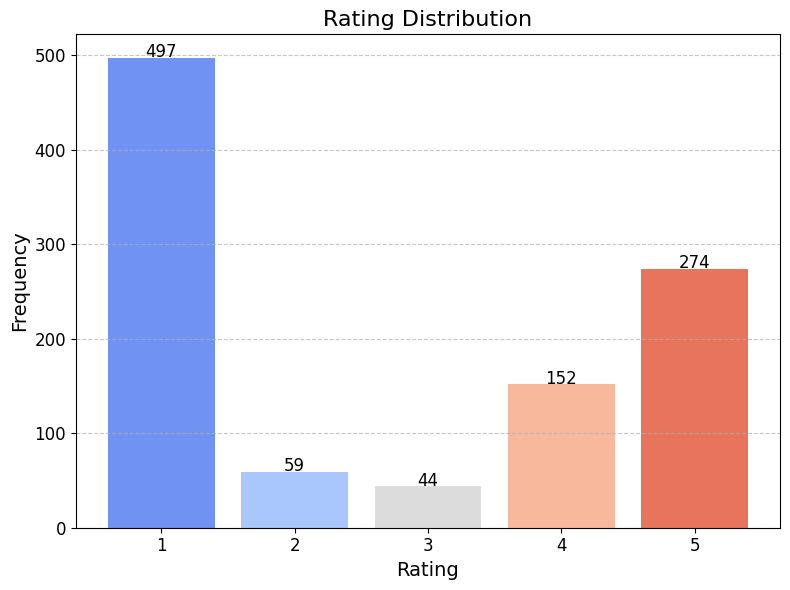

In [ ]:
rating_counts = df['rating'].value_counts().sort_index()

# Set a stylish color palette using seaborn
sns.set_palette("viridis")  # You can choose other palettes like 'magma', 'inferno', etc.

# Plot the distribution with a more stylish approach
plt.figure(figsize=(8, 6))
bars = plt.bar(rating_counts.index, rating_counts.values, color=sns.color_palette("coolwarm", 5))  # 'coolwarm' for a gradient color effect

# Add title and labels
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Rating Distribution', fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(range(1, 6), fontsize=12)
plt.yticks(fontsize=12)

# Add a grid for better visual separation
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{int(height)}', ha='center', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


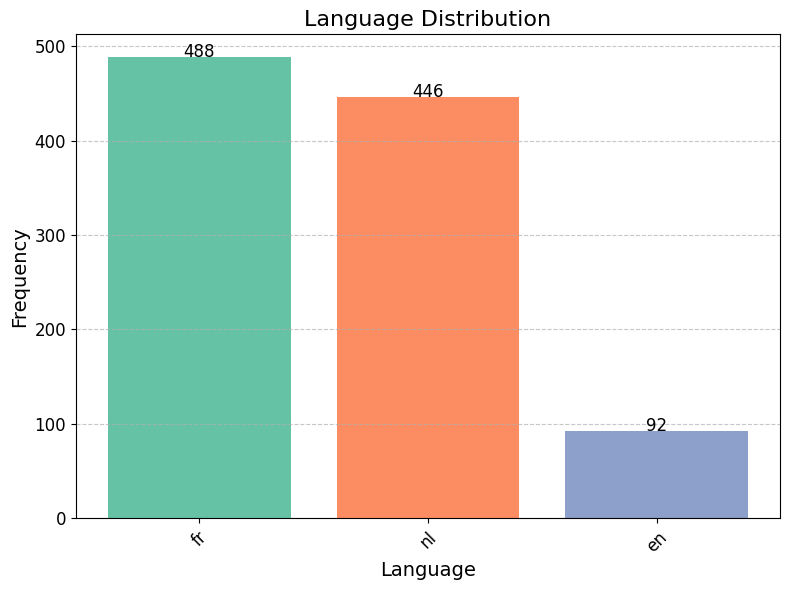

In [ ]:
if 'language' not in df.columns:
    raise ValueError("The CSV file must contain a 'language' column.")

# Count the occurrences of each language
language_counts = df['language'].value_counts()

# Set a stylish color palette using seaborn
sns.set_palette("Set2")  # You can choose other palettes like 'Set1', 'Paired', etc.

# Plot the distribution with a more stylish approach
plt.figure(figsize=(8, 6))
bars = plt.bar(language_counts.index, language_counts.values, color=sns.color_palette("Set2", len(language_counts)))  # Using the 'Set2' palette for distinct colors

# Add title and labels
plt.xlabel('Language', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Language Distribution', fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add a grid for better visual separation
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{int(height)}', ha='center', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()